In [121]:
import numpy as np
import scipy
import scipy.stats
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
from ipywidgets import interact

plt.style.use('fivethirtyeight')

In [122]:
MNIST = fetch_openml('mnist_784', version=1)
images = MNIST['data'].to_numpy().astype(np.double) / 255.

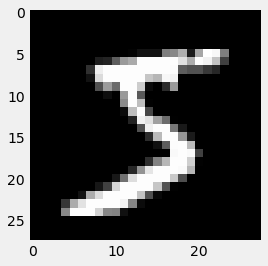

In [123]:
plt.figure(figsize=(4,4))
plt.imshow(images[0].reshape(28,28), cmap='gray');
plt.grid(False)

### 주성분 분석 알고리즘(PCA)

1. Data normalization
2. Covariance matrix 의 eigenvalue, eigenvector 계산    
3. Principal components 에 해당하는 각 벡터의 기저공간에 데이터 사영

In [124]:
# 1. Normalization

def normalize(X):
    N, D = X.shape
    mu = np.mean(X, axis=0)
    Xbar = X - mu
    return Xbar, mu

In [125]:
# 2. Covariance matrix 의 eigenvalue, eigenvector 계산

def eig(S):
    eig_vals, eig_vecs = np.linalg.eig(S)
    sort_indices = np.argsort(eig_vals)[::-1] # 내림차순 정렬
    return eig_vals[sort_indices], eig_vecs[:, sort_indices]

In [126]:
# 3. Principal components 에 해당하는 각 벡터의 기저공간에 데이터 사영

def reconstruct(X, PC):
    return (X @ PC) @ PC.T # vector projection 

In [127]:
def PCA(images, num_components, num_data=1000):
    X = images[:num_data]
    N, D = X.shape

    # 1. Normalization
    X_normalized, mean = normalize(X)

    # 2. Covariance matrix 의 eigenvalue, eigenvector 계산
    S = (X_normalized.T @ X_normalized) / N
    eig_vals, eig_vecs = eig(S)

    # 3. Principal components 에 해당하는 각 벡터의 기저공간에 데이터 사영
    principal_vals, principal_components = np.real(eig_vals[:num_components]), np.real(eig_vecs[:,:num_components])

    reconst_X = reconstruct(X_normalized, principal_components) + mean
    return reconst_X, mean, principal_vals, principal_components

In [128]:
# PCA 데이터 압축 시각화

@interact(NUM_PC=(1, 30), continuous_update=False)
def plot_pca_images(NUM_PC=15):
    num_images_to_show = 10
    reconst_X, _, _, _ = PCA(images, NUM_PC)
    
    origin_image = np.reshape(images[:num_images_to_show], (-1, 28, 28))
    reconst_image = np.reshape(reconst_X[:num_images_to_show], (-1, 28, 28))
    fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 3, 3))
    
    ax[0].imshow(np.concatenate(origin_image, -1), cmap="gray")
    ax[1].imshow(np.concatenate(reconst_image, -1), cmap="gray")

interactive(children=(IntSlider(value=15, description='NUM_PC', max=30, min=1), Output()), _dom_classes=('widg…

In [ ]:
# PCA 갯수에 따른 MSE 계산

In [129]:
def mse(predict, actual):
    return np.square(predict - actual).sum(axis=1).mean()

In [130]:
loss = []
reconstructions = []

for num_component in range(1, 100, 5):
    reconst, _, _, _ = PCA(X, num_component)
    error = mse(reconst, X)
    reconstructions.append(reconst)
    print('n = {:d}, reconstruction_error = {:f}'.format(num_component, error))
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions
loss = np.asarray(loss)

n = 1, reconstruction_error = 46.465431
n = 6, reconstruction_error = 31.284116
n = 11, reconstruction_error = 24.259506
n = 16, reconstruction_error = 19.831531
n = 21, reconstruction_error = 16.731753
n = 26, reconstruction_error = 14.364567
n = 31, reconstruction_error = 12.488758
n = 36, reconstruction_error = 11.002660
n = 41, reconstruction_error = 9.782333
n = 46, reconstruction_error = 8.774709
n = 51, reconstruction_error = 7.918999
n = 56, reconstruction_error = 7.187890
n = 61, reconstruction_error = 6.558557
n = 66, reconstruction_error = 6.020713
n = 71, reconstruction_error = 5.540953
n = 76, reconstruction_error = 5.120755
n = 81, reconstruction_error = 4.744785
n = 86, reconstruction_error = 4.418276
n = 91, reconstruction_error = 4.122307
n = 96, reconstruction_error = 3.853247


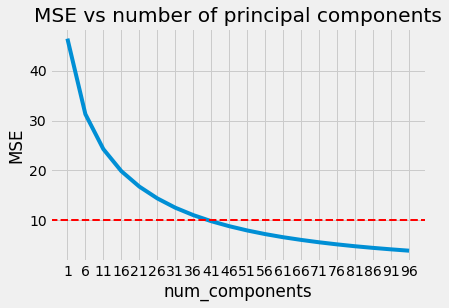

In [131]:
fig, ax = plt.subplots()
ax.plot(loss[:,0], loss[:,1]);
ax.axhline(10, linestyle='--', color='r', linewidth=2)
ax.xaxis.set_ticks(np.arange(1, 100, 5));
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');

In [138]:
@interact(image_idx=(0, 1000))
def show_num_components_reconst(image_idx):
    fig, ax = plt.subplots(figsize=(20., 20.))
    actual = X[image_idx]
    x = np.concatenate([actual[np.newaxis, :], reconstructions[:, image_idx]])
    ax.imshow(np.hstack(x.reshape(-1, 28, 28)[np.arange(10)]), cmap='gray');
    ax.axvline(28, color='orange', linewidth=2)

interactive(children=(IntSlider(value=500, description='image_idx', max=1000), Output()), _dom_classes=('widge…